In [2]:
#pip install opencv-python==3.4.2.17
#pip install opencv-contrib-python==3.4.2.17
#Importing the libraries and openCV
import cv2
print(cv2. __version__)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

3.4.2


In [3]:
#Load the image for key point (SIFT)
image = cv2.imread(r'C:\Users\Hritik Kounsal\Desktop\face.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

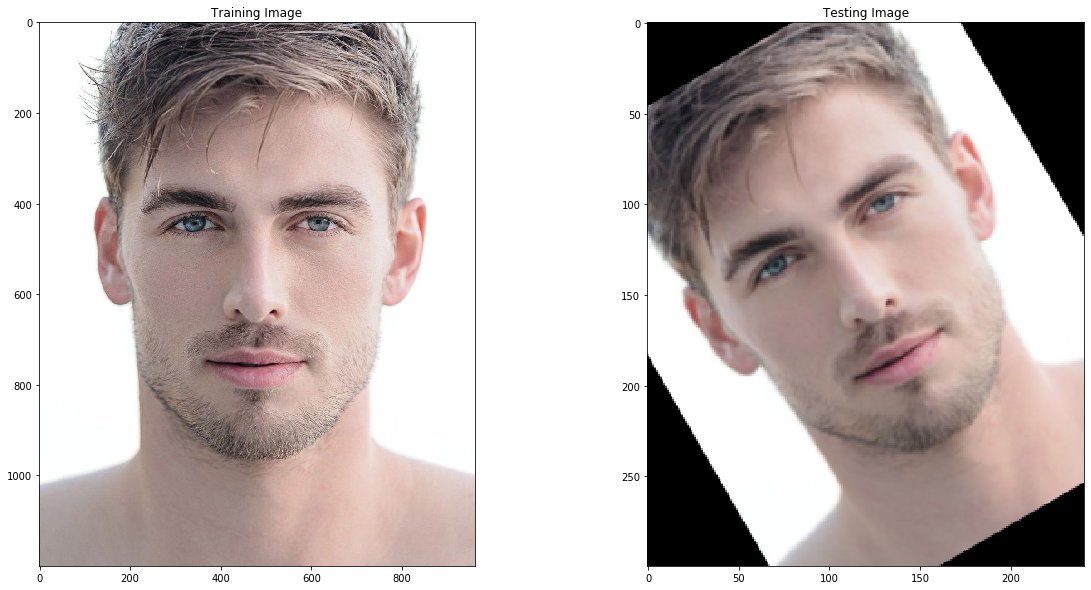

In [5]:
#Now making rotation changes to image.
training_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  3399
Number of Keypoints Detected In The Query Image:  224


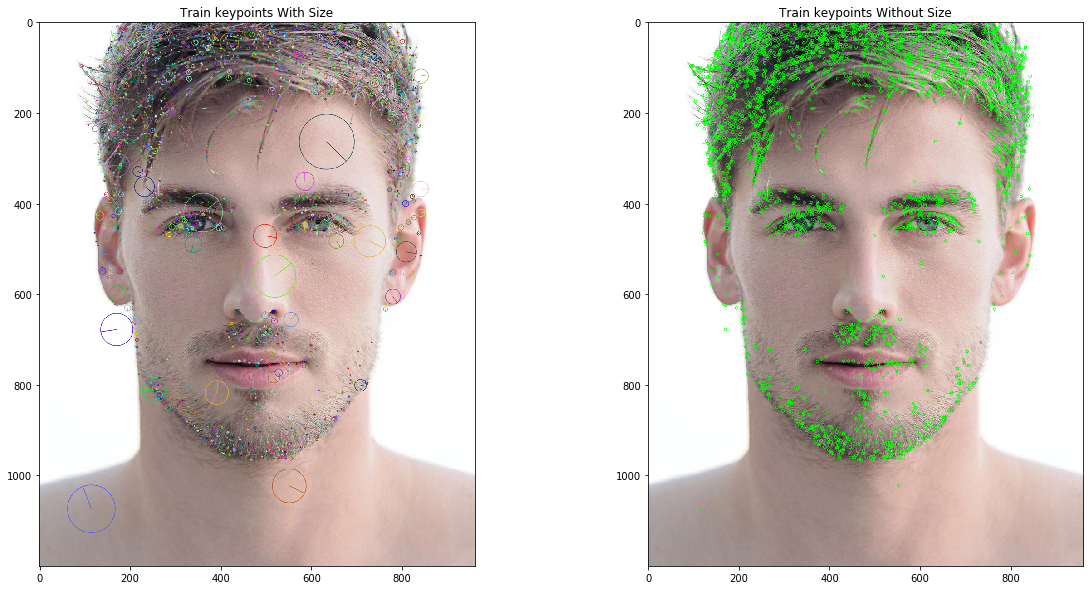

In [6]:
#calling the function.
sift = cv2.xfeatures2d.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

In [7]:
#Calling the SURF method for key point detection
surf = cv2.xfeatures2d.SURF_create(500)

keypoints, descriptors = surf.detectAndCompute(gray, None)
print ("Number of keypoints Detected: ",len(keypoints))

Number of keypoints Detected:  1688


In [ ]:
#Display of the key points
image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Feature Method - SURF', image)
cv2.waitKey()
cv2.destroyAllWindows()